In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import takewhile

Loading and cleaning

In [3]:
#define function to read pajek files
def read_pajek(file):
    with open(file, errors='replace') as f:
        lines = f.readlines()
    lines = [l.strip() for l in lines]
    lines = [l.split() for l in lines]
    n_vertices = int(lines[0][-1]) #number of vertices is the last element of the first line
    nodes = lines[1:n_vertices+1] #nodes are the first n_vertices lines
    #note that line n_vertices+1 is the header for the edges (empty)
    edges = lines[n_vertices+2:] #edges are the rest of the lines

    #construct a dictionary with the node names
    node_names = {int(node[0]): (" ".join(node[1:])).strip('"') for node in nodes}

    #construct a list of node ids
    nodes = [int(node[0]) for node in nodes]

    #select non-empty edge lines
    edges = takewhile(lambda x: len(x) > 1, edges)
    #construct a list of edges
    edges = [(int(edge[0]), int(edge[1])) for edge in edges] #here we discard weights

    #get the names of the nodes for both edges and nodes
    edges = [(node_names[edge[0]], node_names[edge[1]]) for edge in edges]
    nodes = [node_names[node] for node in nodes]

    return nodes, edges, node_names

nodes, edges, node_names = read_pajek('foldoc.net')
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

Exploratory data analysis

In [4]:
#print number of edges and nodes
print("number of edges", G.number_of_edges())
print("number of nodes", G.number_of_nodes())

number of edges 120235
number of nodes 13355


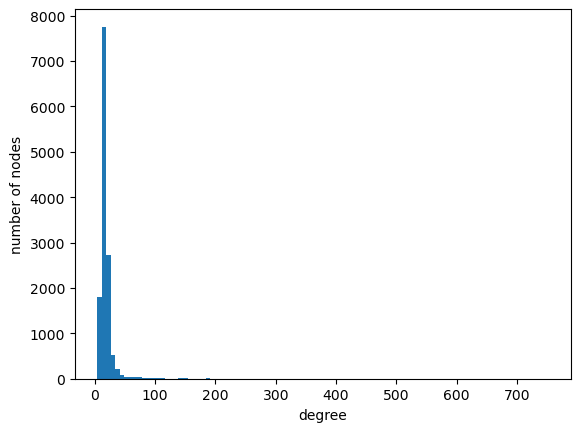

In [12]:
#plot node degree distribution
plt.hist(list(dict(G.degree).values()), bins=100)
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.savefig('FOLDOC_node_degree.png')

In [6]:
#get nodes with highest degree and their degree
sorted(dict(G.degree).items(), key=lambda x: x[1], reverse=True)[:10]

[('Unix', 752),
 ('C', 428),
 ('operating system', 422),
 ('Usenet', 407),
 ('IBM', 393),
 ('Internet', 388),
 ('protocol', 348),
 ('ASCII', 343),
 ('MS-DOS', 284),
 ('standard', 269)]

In [6]:
#most central concepts to learn computer science
#measured in different centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

#print top 10 central nodes
print("Degree centrality")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Closeness centrality")
print(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Betweenness centrality")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Eigenvector centrality")
print(sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Degree centrality
[('Unix', 0.056312715291298485), ('C', 0.03205032200089861), ('operating system', 0.03160101842144676), ('Usenet', 0.030477759472817133), ('IBM', 0.029429384454096152), ('Internet', 0.029054964804552944), ('protocol', 0.026059607608207278), ('ASCII', 0.02568518795866407), ('MS-DOS', 0.021267036094054215), ('standard', 0.02014377714542459)]
Closeness centrality
[('Unix', 0.3867809766552743), ('Usenet', 0.367473858007705), ('operating system', 0.3528883251413773), ('C', 0.3517820921472037), ('Internet', 0.34414864830038916), ('IBM', 0.33969271469271467), ('MS-DOS', 0.3291675910177722), ('protocol', 0.3286976641149974), ('standard', 0.32474891174825515), ('IBM PC', 0.3222412586568857)]
Betweenness centrality
[('operating system', 0.05988012776812383), ('Unix', 0.05592709870405972), ('ASCII', 0.05547922715453809), ('C', 0.0347494600770357), ('Internet', 0.02838253802773802), ('Usenet', 0.026027522966206026), ('WEB', 0.024848721883458175), ('IBM PC', 0.01955809198392634), 

In [7]:
#all paths ending with 'artificial neural network'
paths = nx.single_source_shortest_path(G.reverse(), 'Unix')
for source, path in paths.items():
    path.reverse()
    print(source, path)

Unix ['Unix']
ASM ['ASM', 'Unix']
Bell Laboratories ['Bell Laboratories', 'Unix']
Berkeley System Distribution ['Berkeley System Distribution', 'Unix']
server ['server', 'Unix']
Tcl ['Tcl', 'Unix']
Emacs ['Emacs', 'Unix']
American Telephone and Telegraph, Inc. ['American Telephone and Telegraph, Inc.', 'Unix']
DEC ['DEC', 'Unix']
GCOS ['GCOS', 'Unix']
System 5 ['System 5', 'Unix']
 ['', 'Unix']
3-tier ['3-tier', 'Unix']
4.2BSD ['4.2BSD', 'Unix']
64 bit ['64 bit', 'Unix']
A# ['A#', 'Unix']
A1 security ['A1 security', 'Unix']
ABC ['ABC', 'Unix']
abort ['abort', 'Unix']
accept ['accept', 'Unix']
ACCU ['ACCU', 'Unix']
Acorn Computers Ltd. ['Acorn Computers Ltd.', 'Unix']
ADABAS ['ADABAS', 'Unix']
Ada/Ed ['Ada/Ed', 'Unix']
Advanced Interactive eXecutive ['Advanced Interactive eXecutive', 'Unix']
Advanced Research Projects Agency ['Advanced Research Projects Agency', 'Unix']
Adventure Definition Language ['Adventure Definition Language', 'Unix']
AEGIS ['AEGIS', 'Unix']
Aegis ['Aegis', 'Unix'

In [10]:
#How many nodes have degree > 10
n = len([node for node, degree in dict(G.degree).items() if degree > 10])
print("Number of nodes with degree > 10:", n)
print("Percentage of nodes with degree > 10:", n/G.number_of_nodes())

Number of nodes with degree > 10: 12382
Percentage of nodes with degree > 10: 0.9271433919880194


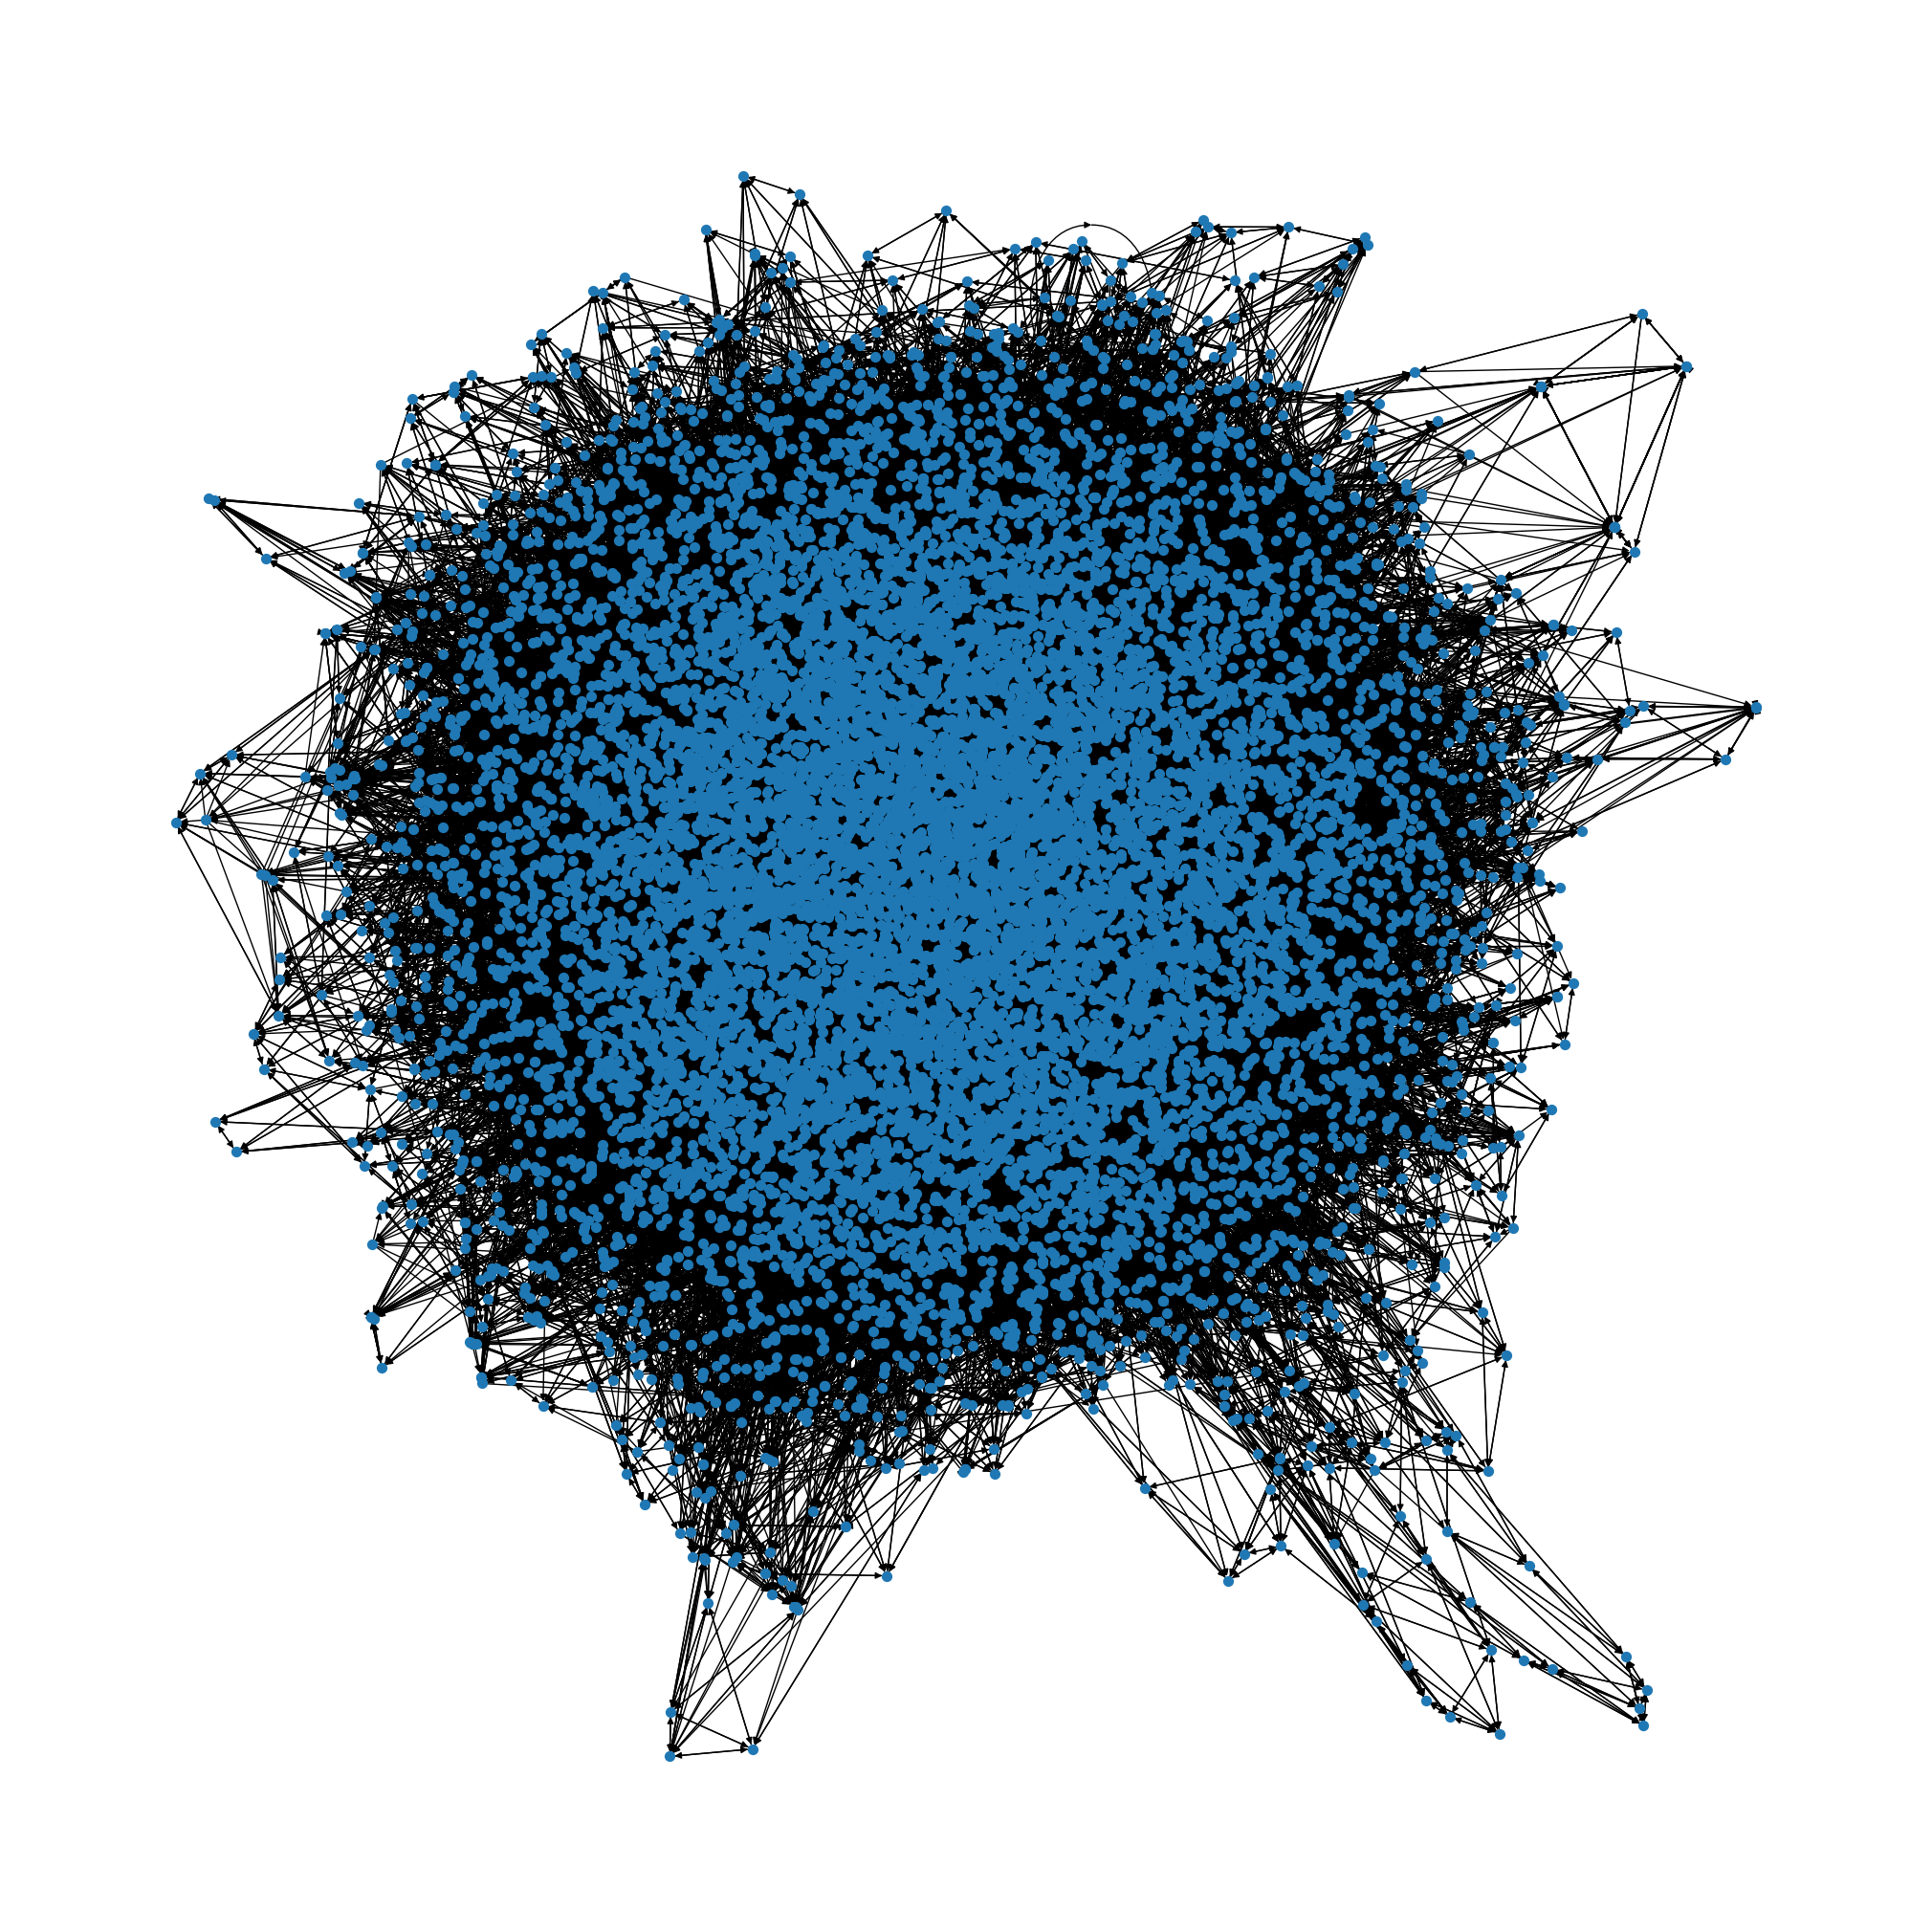

In [11]:
#Visualize the structure of graph with edges for nodes with degree > 10
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=50)
plt.savefig('foldoc.png')